## Customer Churn Prediction
Reference: 
- 1. https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/11_chrun_prediction/churn.ipynb
- 2. https://www.youtube.com/watch?v=JnlM4yLFNuo&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=59

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib
import tensorflow as tf
from tensorflow import keras
import math
from sklearn.model_selection import train_test_split

In [2]:
# Import dataset
df = pd.read_csv('./data/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Drop customer ID
df.drop(['customerID'],axis=1, inplace=True)
# 'SeniorCitizen',
categorical_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','SeniorCitizen','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']

The TotalCharges is in object type. I'll change it to numerical type.

I ran to_numeric the first round but it can't convert because TotalCharges has some blank string. I'll use errors='coerce' to ignore those blank and change them to NaN

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
# Drop 11 rows with TotalCharges is NaN.
df = df[df['TotalCharges'].notnull()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [10]:
categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'SeniorCitizen',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

Plot categorical columns relating to Churn

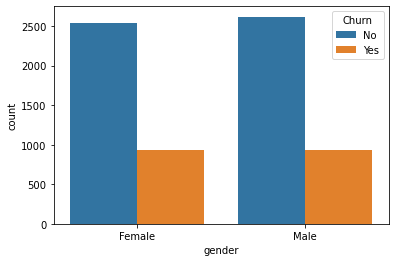

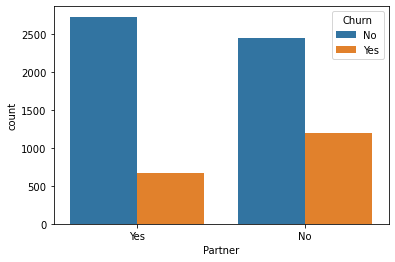

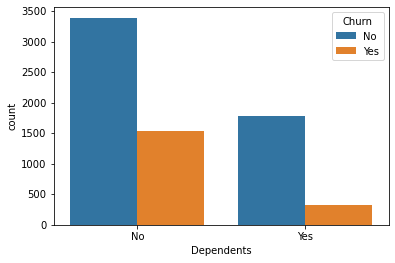

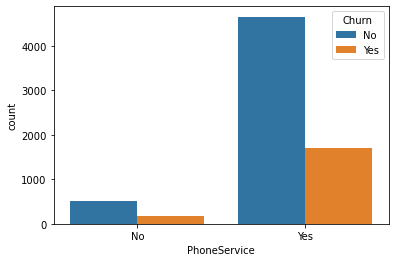

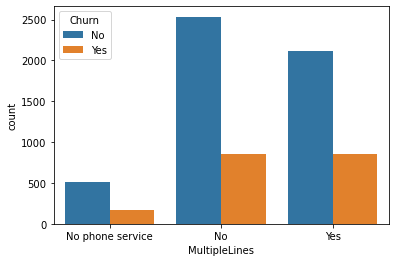

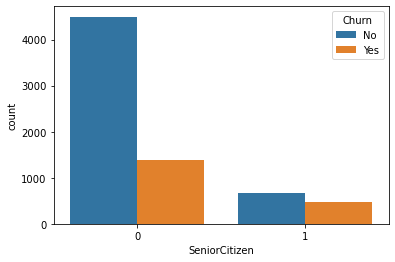

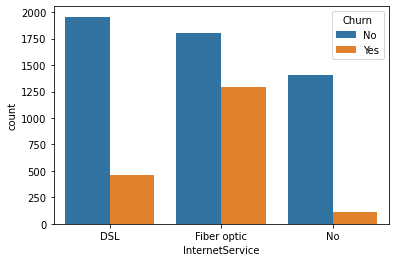

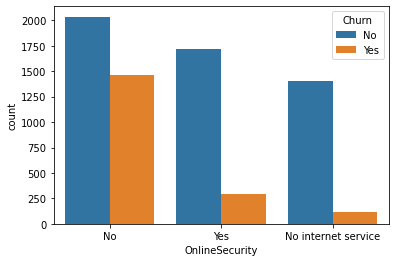

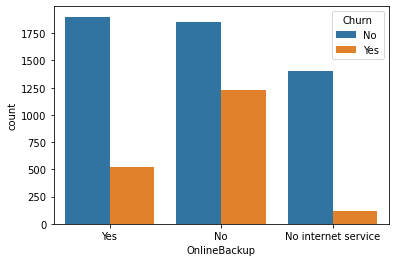

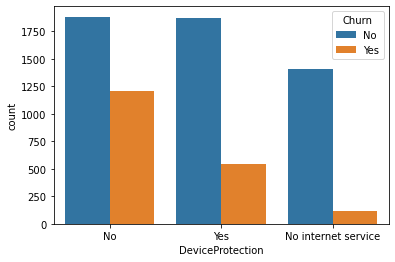

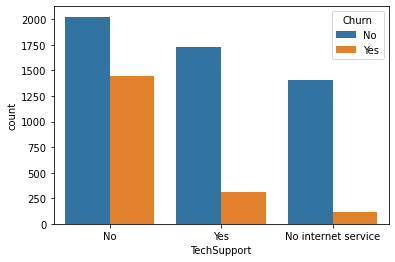

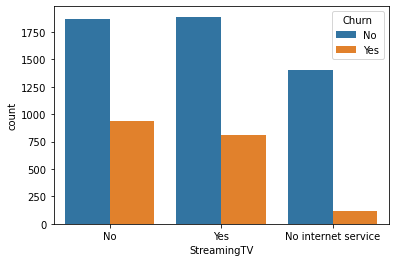

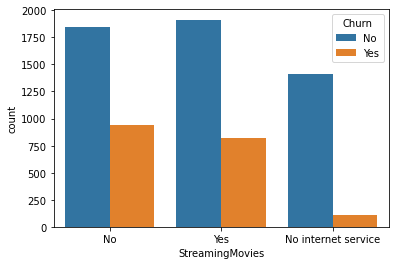

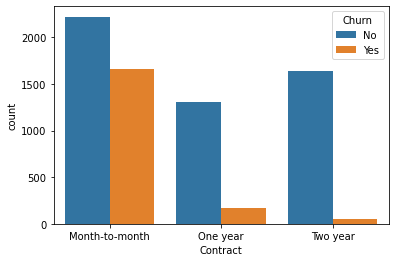

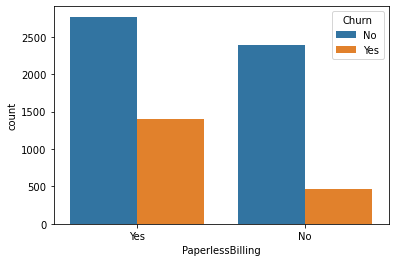

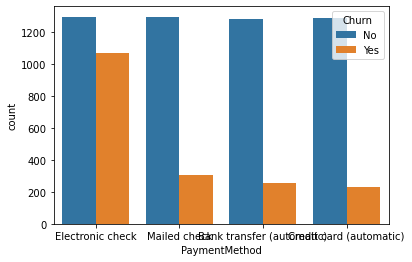

In [11]:
for column in categorical_columns:
    sns.countplot(x=column, hue='Churn', data=df)
    plt.show()

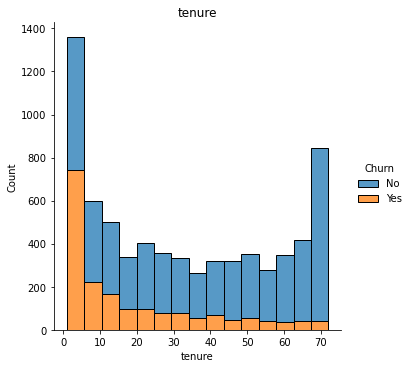

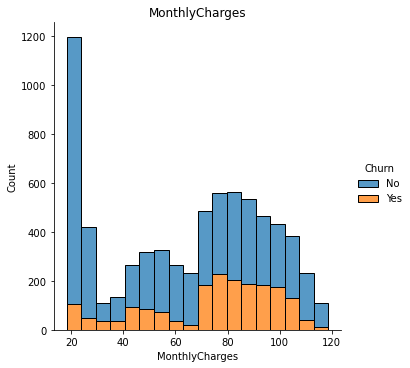

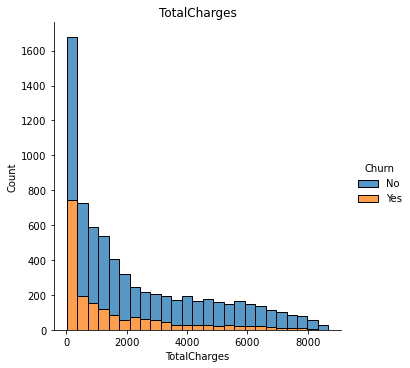

In [12]:
# Plot histogram for numerical data with hue on y column 
for i in numerical_columns:
    sns.displot(x=i,data=df,hue='Churn',multiple="stack")
    plt.title(i)
    plt.show()

Some categorical columns has more than two categories. We will try to convert to two categories. For example, in OnlineSecurity, we will assume 'No Internet service' as 'No' in that category. 

In [13]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [14]:
columns_to_change = ['OnlineSecurity','OnlineBackup' ,'DeviceProtection','TechSupport' ,'StreamingTV','StreamingMovies']
for column in columns_to_change:
    df[column] = df[column].apply(lambda x: 'No' if x=='No internet service' else x)
    
# for MultipleLines, changes 'No phone service' to No
df['MultipleLines'] = df['MultipleLines'].apply(lambda x: 'No' if x == 'No phone service' else x)

In [15]:
for column in df.columns:
    print(f'{column}:  {df[column].unique()}')

gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:  ['No' 'Yes']


In [16]:
# Now we will convert columns with 'Yes' and 'No' categories  into 1 and 0 values.
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
    
# For gender column, replace Female = 1 & Male = 0 
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [17]:
# For columns with more than 2 categories, we will use 'one-hot-encoding' by get_dummies
for column in df.columns:
    if df[column].dtypes == 'object':
        print(f'{column}:  {df[column].unique()}')

InternetService:  ['DSL' 'Fiber optic' 'No']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [18]:
df2 = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
for column in df2.columns:
    print(f'{column}:  {df2[column].unique()}')

gender:  [1 0]
SeniorCitizen:  [0 1]
Partner:  [1 0]
Dependents:  [0 1]
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:  [0 1]
MultipleLines:  [0 1]
OnlineSecurity:  [0 1]
OnlineBackup:  [1 0]
DeviceProtection:  [0 1]
TechSupport:  [0 1]
StreamingTV:  [0 1]
StreamingMovies:  [0 1]
PaperlessBilling:  [1 0]
MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:  [0 1]
InternetService_DSL:  [1 0]
InternetService_Fiber optic:  [0 1]
InternetService_No:  [0 1]
Contract_Month-to-month:  [1 0]
Contract_One year:  [0 1]
Contract_Two year:  [0 1]
PaymentMethod_Bank transfer (automatic):  [0 1]
PaymentMethod_Credit card (automatic):  [0 1]
PaymentMethod_Electronic check:  [1 0]
PaymentMethod_Mailed check:  [0 1]


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

Now all data type are numerical!

Next step, we need to scale MonthlyCharges, tenure, and TotalCharges.

In [20]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

### Model Building

In [21]:
X =  df2.drop('Churn',axis=1)
y = df2['Churn']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 5)

In [23]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [24]:
   
model= keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.7404
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.7914
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8066
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8061
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8082
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8033
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8120
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8097
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8117
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4131 - accura

In [25]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.7818


[0.4543913006782532, 0.7818052768707275]

In [26]:
yp = model.predict(X_test)
yp[:5]

array([[0.13725251],
       [0.52706987],
       [0.00948352],
       [0.79903316],
       [0.6940757 ]], dtype=float32)

In [27]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.64      0.57      0.60       408

    accuracy                           0.78      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.78      0.78      1407



<AxesSubplot:>

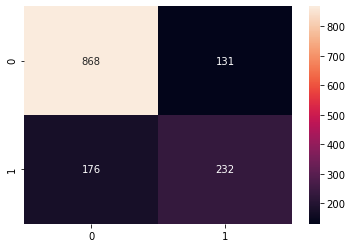

In [29]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [30]:
# Save model
model.save('./model')

INFO:tensorflow:Assets written to: ./model\assets


In [31]:
model = keras.models.load_model('./model')

In [32]:
model

I recognize that there's a imbalance between classes of the dependent variable (y) in our dataset. The number of non-churn data point ('Churn' == 0) is almost three times larger than the churn ones ('Churn' == 1). The imbalance might be the reason why our f1-score in 1 is very low.

 I will use different method to handle this imbalance: 

### Method 1: Under-sampling method on the majority class

In [33]:
# Class count
count_class_0,count_class_1 = df2.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]
df_class_0.shape

(5163, 27)

In [34]:
df_class_1.shape

(1869, 27)

We can see that the Churn == 0 makes out the majority of the Churn class


Now, I will sample the class 0 with the same number in class 1

In [35]:
df_class_0_under = df_class_0.sample(count_class_1)

In [36]:
# Concat the new class 0 with class 1
df_test_under  = pd.concat([df_class_0_under,df_class_1])
df_test_under.shape

(3738, 27)

In [37]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [38]:
# Create new X and y 
X = df_test_under.drop('Churn',axis=1)
y = df_test_under['Churn']

In [39]:
# Use train_test_split to create train & test set. Add 'stratify' paremeter to split in a stratified fashion. 
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [40]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [41]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [42]:
y_pred1 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6733 - accuracy: 0.5674
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7402
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7636
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7684
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7687
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7670
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7779
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7695
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7746
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7821
Epoch 11/

The precision, recall and f1-score has increased for class 1 with the trade-off on the decrease on class 0.

### Method 2: Oversampling

In this method, regarding class 'Churn' 0 has more samples than class 'Churn' 1,  we will over-samplimg class 1 based on the number of samples in class 0.

In [44]:
count_class_0,count_class_1

(5163, 1869)

In [45]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape

(5163, 27)

In [46]:
df_test_over = pd.concat([df_class_0,df_class_1_over])
df_test_over.shape
print('Random under-sampling:')
print(df_test_over.Churn.value_counts())

Random under-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [47]:
X = df_test_over.drop('Churn',axis=1)
y = df_test_over['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [48]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [49]:
# Model training
y_pred2 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 0.6237 - accuracy: 0.6515
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.7520
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7490
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7657
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7674
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7726
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4620 - accuracy: 0.7786
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7822
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7736
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4743 - accura

We can realize that all the scores for precision, recall, and f1-score increase compare the method 1 (Under-sampling)

### Method 3: SMOTE (Synthetic Minority Oversampling Technique)

In [50]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']

y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_sample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)


In [53]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [54]:
# Model training
y_pred3 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5976 - accuracy: 0.6681
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7758
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7765
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7848
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7871
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.7878
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7865
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.7907
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.7960
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4333 - accura

The f1-score and accuracy increase again! This is a good sign for us to pick a good method.

### Method 4: Use of Ensemble with under-sampling

In [55]:
df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [56]:
X = df2.drop('Churn',axis=1)
y = df2['Churn']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [58]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

We will find the the ratio differnce between class Churn 0 and 1 to decide how many batches for iteration in this method.

In [66]:
y_train.value_counts()[0]/y_train.value_counts()[1]

2.762541806020067

We might divide the class 0 into 3 batches

In [62]:
df3 = X_train.copy()
df3['Churn'] = y_train

df3_class0 = df3[df3['Churn']==0]
df3_class1 = df3[df3['Churn']==1]

In [63]:
df3_class0.shape,df3_class1.shape

((4130, 27), (1495, 27))

In [68]:
# Creat a function to get batch with start and end index.
def get_train_batch(df_majority, df_minority, start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)

    X_train = df_train.drop('Churn',axis=1)
    y_train = df_train['Churn']

    return X_train, y_train 

In [70]:
# Get the batch with the index from 0 to 1495
X_train,y_train = get_train_batch(df3_class0,df3_class1,0,1495)

# Model training
y_pred_1 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6055 - accuracy: 0.6984
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7579
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7704
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7710
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7717
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7723
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7716
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.7904
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7678
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7735
Epoch 11/

In [74]:
# Get the batch with the index from 1495 to 2990
X_train,y_train = get_train_batch(df3_class0,df3_class1,1495,2990)

# Model training
y_pred_2 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.7364 - accuracy: 0.4737
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7368
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7521
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7479
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7616
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.7584
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7734
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7766
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7621
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7694
Epoch 11/

In [73]:
# Get the batch with the index from 2990 to 4130
X_train,y_train = get_train_batch(df3_class0,df3_class1,2990,4130)

# Model training
y_pred_3 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.7122 - accuracy: 0.4870
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7567
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7722
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7721
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7743
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7645
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7802
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7896
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7830
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.7869
Epoch 11/

In [77]:
len(y_pred_3)

1407

In [80]:
# Set vote for three y_pred

y_pred_final = y_pred_1.copy()

for i in range(len(y_pred_1)):
    n_ones = y_pred_1[i] + y_pred_2[i] + y_pred_3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0


In [81]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.47      0.78      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.70      0.72      1407



The f1-score of the class does not improve much.
It seems that method 3 SMOTE provide the best result in our case.